## Image Compression

SVD (Singular Value Decomposition) is a linear algebra method used to decompose a matrix into three simpler matrices, making it easier to analyze and or manipulate.

The SVD of a mxn matrix is represented as:
$$
A = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^{T}, 
$$

Where:

- U:  An mxn orthogonal matrix whose columns are the left singular vectors of 
A
- Sigma: A diagonal m×n matrix containing the singular values of A in descending order. 
- V^T: The transpose of an n×n orthogonal matrix, where the columns are the right singular vectors of A


In [7]:
from matplotlib.image import imread #image read to load our image
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize']=[16,8]

I'm going to apply image compression on a picture I took of a flower a few years ago. When I first load it in, it is a full color image, so it's actually a m by n by 3 color channels. So, I will convert it to greyscale:

In [8]:
A = imread('pic/flower.jpg') #load image of my flower into this matrix A
X = np.mean(A, -1) # convert RGB to greyscale




Let's see the original picture for reference.

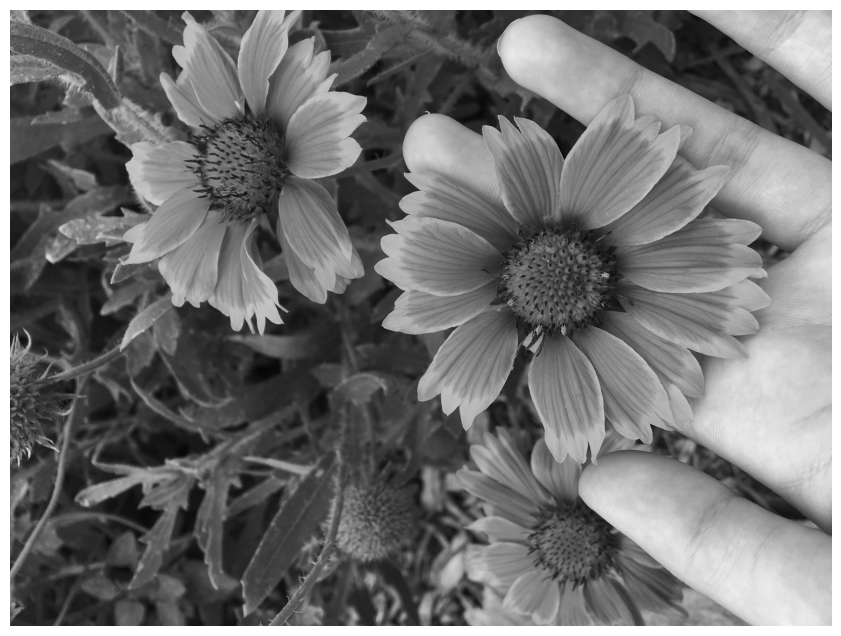

In [9]:
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

Using our original matrix that is our image, we need to factor into the unitary matrices U, V and Sigma.
We perform Singular Value Decomposition on the grayscale image matrix `X`, decomposing it into `U`, `S`, and `V^T`.
- `U`: Left singular vectors (image patterns)
- `S`: Singular values (importance/weight of each pattern)
- `V^T`: Right singular vectors

Together, these represent the image as:  
`X = U @ S @ V^T`



To compress the image:
- We reconstruct it using only the top `r` singular values (and corresponding vectors).

`X_approx = U_r @ S_r @ V^T_r`
Where:
- `U_r` is the first `r` columns of `U`
- `S_r` is the top `r × r` block of singular values
- `V^T_r` is the first `r` rows of `V^T`

This simulates rank-`r` approximations of the image.
Using the code below, we will visualize how the image quality gradually improves as `r` increases (e.g., 5 → 20 → 100).

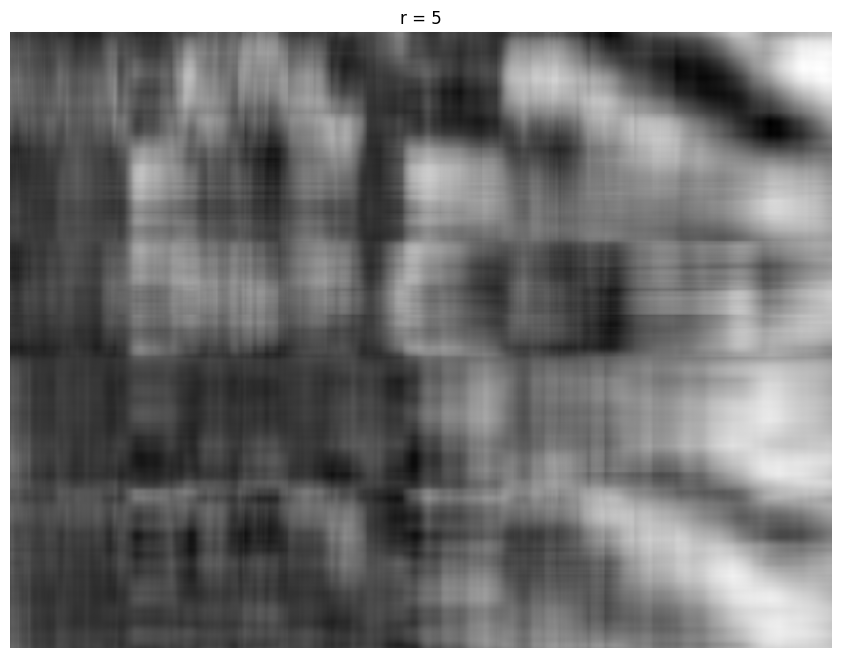

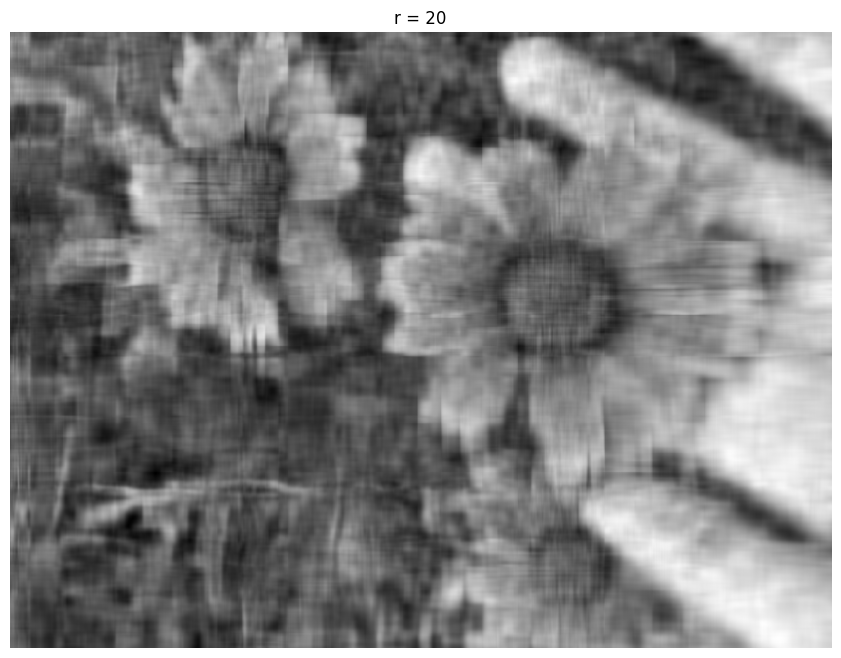

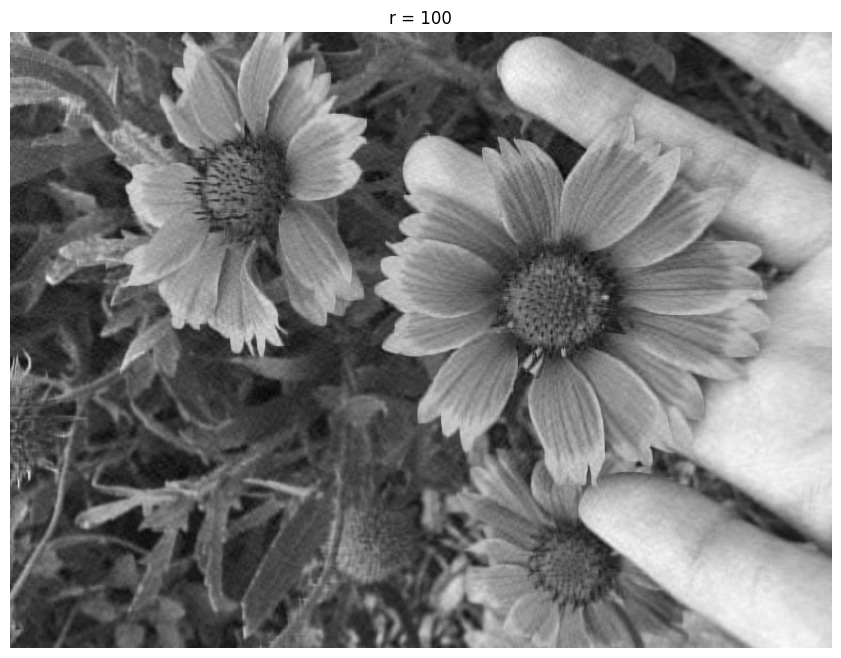

In [10]:
U,S,VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S) # extract out the diagonal singular values from the S matrix

j=0
for r in (5,20,100):
    X_approx = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j+=1
    img = plt.imshow(X_approx)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

## Results
From the output images, we can see that:
- r = 5 only retains the rough structure of the image.
- r = 20 improves clarity but still lacks a good amount of details.
- r=100 provides a very close approximation to the original image.

---
We can now construct a plot that shows:
- The **magnitude** of singular values (on a logarithmic scale) to see how quickly they decay.
- The **cumulative sum** of normalized singular values to understand how many components are needed to capture most of the image’s information or energy.


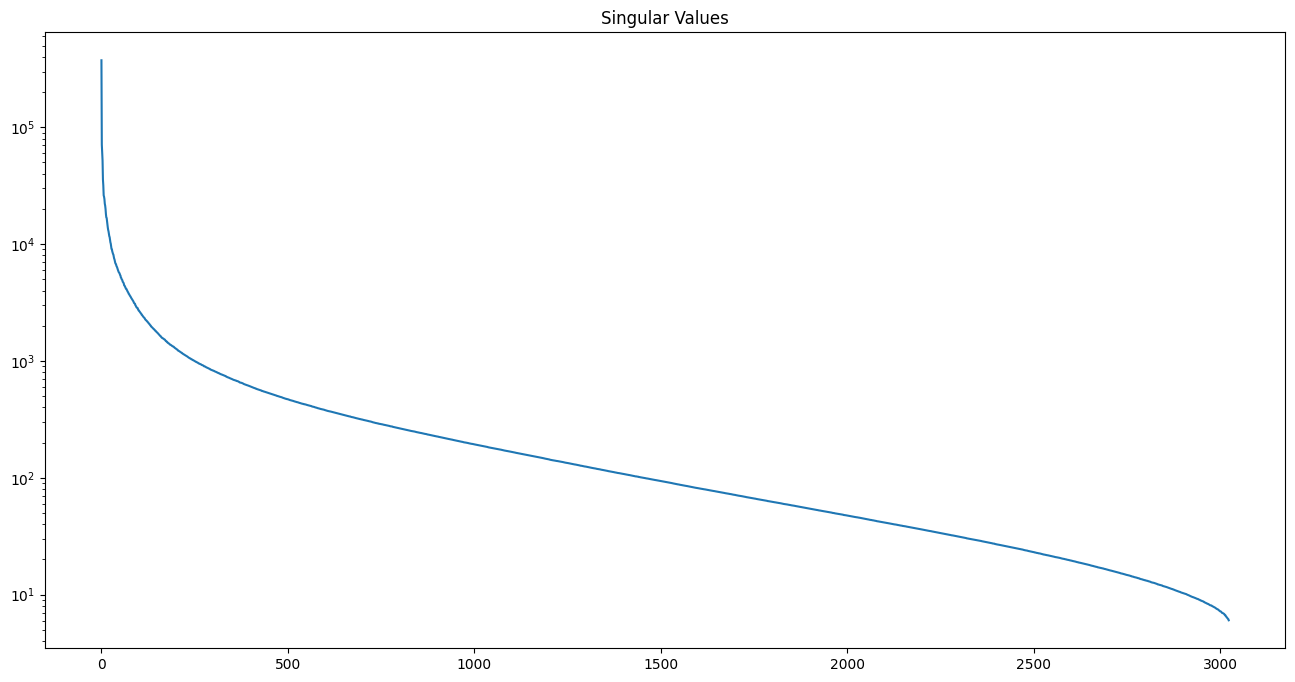

<function matplotlib.pyplot.show(close=None, block=None)>

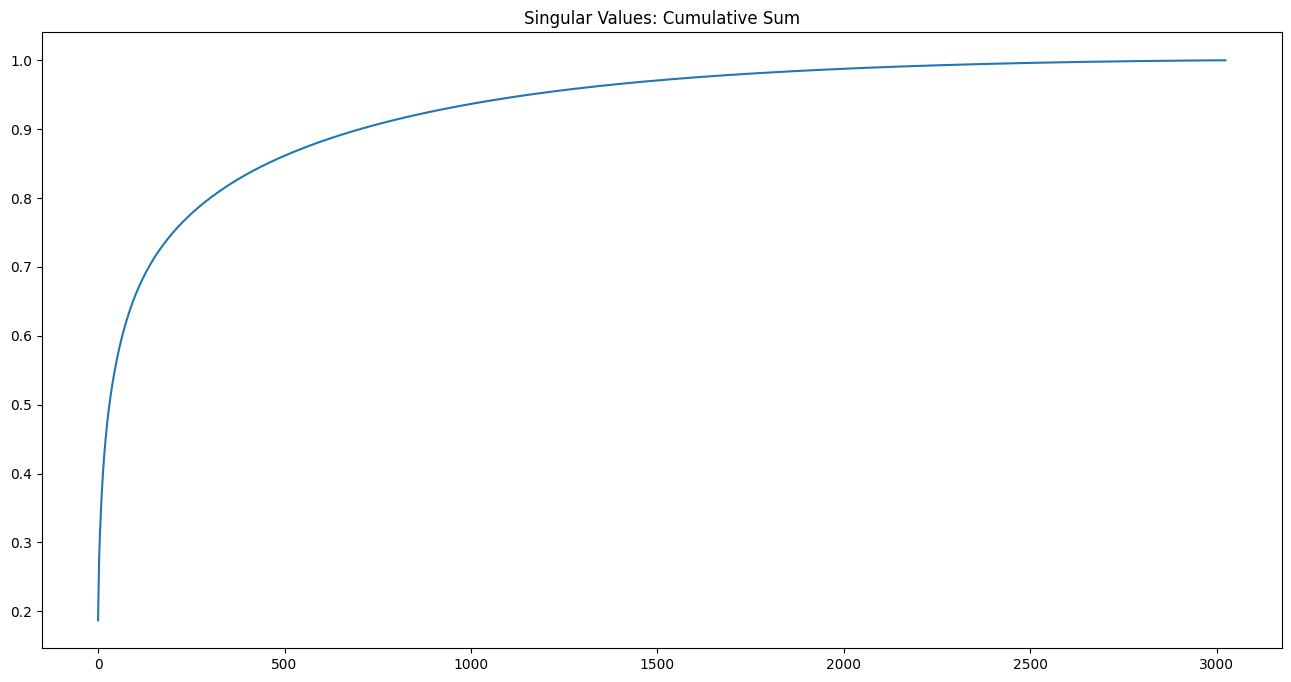

In [11]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show

The first plot shows the magnitude of each singular value on a logarithmic scale.
After a few hundred components, the singular values show that the later components don't contribute as much to the construction of the image.

The second graph shows the cumulative explained variance as a function of the number of ocmponents. We can see that it grows very quickly in the beginning and levels after a bit, indicating that the first few components capture the majority of the informaiton/energy of the image.